In [18]:
import numpy as np
import matplotlib.pyplot as plt
import samplooker as slook
import pickle, TOFPlanet, ppwd
import scipy as sp
from scipy import stats
from scipy.stats import norm
import statistics
%matplotlib inline
plt.style.use('seaborn-white')

In [19]:
#uj0_deg4 = 'uranus/samples/deg4_observables_J0_planets.pickle'
#uj2_deg4 = 'uranus/samples/deg4_observables_J2_planets.pickle'
#uj0_deg6 = 'uranus/samples/deg6_observables_J0_planets.pickle'
#uj2_deg6 = 'uranus/samples/deg6_observables_J2_planets.pickle'
#uj0_deg8 = 'uranus/samples/deg8_observables_J0_planets.pickle'
#uj2_deg8 = 'uranus/samples/deg8_observables_J2_run2_planets.pickle'

In [20]:
deg4_obsJ0 = 'uranus/samples/deg4_obsJ0_planets.pickle'
deg6_obsJ0 = 'uranus/samples/deg6_obsJ0_planets.pickle'
deg8_obsJ0 = 'uranus/samples/deg8_obsJ0_planets.pickle'

In [21]:
def load_planets(fname):
    with open(fname, 'rb') as f:
        planets = pickle.load(f)
        print(f"Found {len(planets)} planets in {fname}.")
    return planets

In [22]:
def hist_moi(fname, c, title, newfig=True, bins='auto', density=True, **kwargs):
    # Prepare the data
    planets = load_planets(fname)
    ice = np.array([p.NMoI for p in planets])
    # Fit a normal distribution to the data: mean and standard deviation
    mu, std = norm.fit(ice)
    # Plot the PDF
    x = np.linspace(min(ice), max(ice), 1000)
    p = norm.pdf(x, mu, std)
    # Plot the histogram
    plt.hist(ice, color=c, bins=bins, density=density, **kwargs, alpha=0.5)
    # Plot the fit
   #plt.plot(x, p, label=['mu= {:.5f}'.format(mu), 'std= {:.5f}'.format(std)], color='red')
    plt.title(title)
    plt.xlabel(r'Normalized moment of inertia, $I/Ma_0^2$')
    plt.xlim(min(ice), max(ice))
    plt.legend()
    plt.savefig('Hist MOI', dpi=300)

In [23]:
def hist_J2(fname, c, title, newfig=True, bins='auto', density=True, **kwargs):
    # Prepare the data
    planets = load_planets(fname)
    J2 = (np.array([p.Js[1] for p in planets]))*1e6
    # Fit a normal distribution to the data: mean and standard deviation
    mu, std = norm.fit(J2)
    # Plot the PDF
    x = np.linspace(min(J2), max(J2), 1000)
    p = norm.pdf(x, mu, std)
    # Plot the histogram
    plt.hist(J2, color=c, bins=bins, density=density, **kwargs, alpha=0.5)
    # Plot the fit
    #plt.plot(x, p, label=['mu= {:.5f}'.format(mu), 'std= {:.6f}'.format(std)], color='red')
    plt.title(title)
    plt.xlabel(r'J2 x 10$^6$')
    plt.xlim(min(J2), max(J2))
    plt.legend()
    plt.savefig('Hist J2', dpi=300)

In [24]:
def rho_profile(fname, title, c, newfig=True, **kwargs):
    planets = load_planets(fname)
    rho = (np.array([p.rhoi for p in planets]))/1000
    r = np.array([p.si for p in planets])
    for i in range(0,1000,50):
        plt.plot(r[i], rho[i], alpha=0.5, color=c, **kwargs) 
        plt.title(title)
        plt.xlabel(r'Level surface radius, $s/R_m$')
        plt.ylabel(r'$\rho$ [1000 kg/m$^3$]')
        #plt.savefig('Uranus_density_profile', dpi=300)

In [25]:
def rho_profile1(fname, title, c, newfig=True, **kwargs):
    planets = load_planets(fname)
    rho = np.array([p.rhoi for p in planets]).T
    rcs = rho[-1,:]
    ind = np.argsort(rcs)
    rho = (rho[:,ind])/1000
    r = np.array(planets[0].si/planets[0].s0).T
    print(r.shape)
    for i in range(0,1000,50):
        plt.plot(r, rho[:,i], alpha=0.5, color=c, **kwargs)
        plt.title(title)
        plt.xlabel(r'Level surface radius, $s/R_m$')
        plt.ylabel(r'$\rho$ [1000 kg/m$^3$]')
        plt.savefig('Density Profile', dpi=300)
        #plt.fill_between()

In [26]:
def density_envelope(fname, c, newfig=True, prctile=2, **kwargs):
    # Prepare the data
    planets = load_planets(fname)
    profs = np.array([p.rhoi for p in planets]).T
    prcs_lo = prctile
    prcs_hi = 100 - prcs_lo
    x = planets[0].si/planets[0].s0
    ylo = np.percentile(profs, prcs_lo, axis=1)/1000
    yhi = np.percentile(profs, prcs_hi, axis=1)/1000

    # Prepare the canvas
    #if newfig:
        #plt.figure(figsize=(8,6))

    # Plot the shaded regions
    plt.fill_between(x, ylo, yhi, color=c, alpha=0.5, **kwargs)

    # Style, annotate, and show
    plt.xlabel(r'Level surface radius, $s/R_m$')
    plt.ylabel(r'$\rho$ [1000 kg/m$^3$]')
    plt.title('Uranus Density Envelope')
    plt.legend()
    plt.savefig('Density Envelope', dpi=300)
   # plt.show(block=False)

In [27]:
#hist_moi(uj0_deg4, 'red', 'Uranus MoI with J0 ', label='Degree 4')
#hist_moi(uj2_deg4, 'red', 'Uranus MoI with J2 ', label='Degree 4')
#hist_moi(uj0_deg6, 'green', 'Uranus MoI with J0', newfig=False, label='Degree 6')
#hist_moi(uj2_deg6, 'green', 'Uranus MoI with J2', newfig=False, label='Degree 6')
#hist_moi(uj0_deg8, 'blue', 'Uranus MoI with J0', newfig=False, label='Degree 8')
#hist_moi(uj2_deg8, 'blue', 'Uranus MoI with J2', newfig=False, label='Degree 8')

Found 2000 planets in uranus/samples/deg4_obsJ0_planets.pickle.
Found 2000 planets in uranus/samples/deg6_obsJ0_planets.pickle.
Found 2000 planets in uranus/samples/deg8_obsJ0_planets.pickle.


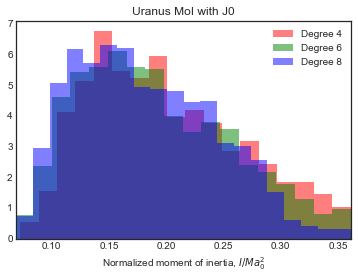

In [28]:
hist_moi(deg4_obsJ0, 'red', 'Uranus MoI with J0', label='Degree 4')
hist_moi(deg6_obsJ0, 'green', 'Uranus MoI with J0', label='Degree 6')
hist_moi(deg8_obsJ0, 'blue', 'Uranus MoI with J0', label='Degree 8')

In [29]:
#hist_J2(uj0_deg4, 'red', 'Uranus J0', label='Degree 4')
#hist_J2(uj0_deg6, 'green', 'Uranus J0 ', newfig=False, label='Degree 6')
#hist_J2(uj0_deg8, 'blue', 'Uranus J0', newfig=False, label='Degree 8')

Found 2000 planets in uranus/samples/deg4_obsJ0_planets.pickle.
Found 2000 planets in uranus/samples/deg6_obsJ0_planets.pickle.
Found 2000 planets in uranus/samples/deg8_obsJ0_planets.pickle.


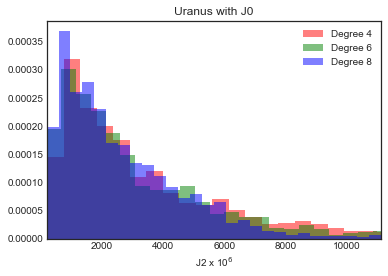

In [30]:
hist_J2(deg4_obsJ0, 'red', 'Uranus with J0', label='Degree 4')
hist_J2(deg6_obsJ0, 'green', 'Uranus with J0 ', newfig=False, label='Degree 6')
hist_J2(deg8_obsJ0, 'blue', 'Uranus with J0', newfig=False, label='Degree 8')

Found 2000 planets in uranus/samples/deg4_obsJ0_planets.pickle.
Found 2000 planets in uranus/samples/deg6_obsJ0_planets.pickle.
Found 2000 planets in uranus/samples/deg8_obsJ0_planets.pickle.


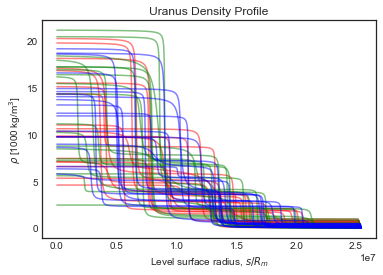

In [31]:
rho_profile(deg4_obsJ0,'Uranus Density Profile', 'red', label='Degree 4')
rho_profile(deg6_obsJ0,'Uranus Density Profile', 'green', newfig=False, label='Degree 6')
rho_profile(deg8_obsJ0,'Uranus Density Profile', 'blue', newfig=False, label='Degree 8')

Found 2000 planets in uranus/samples/deg4_obsJ0_planets.pickle.
(4096,)
Found 2000 planets in uranus/samples/deg6_obsJ0_planets.pickle.
(4096,)
Found 2000 planets in uranus/samples/deg8_obsJ0_planets.pickle.
(4096,)


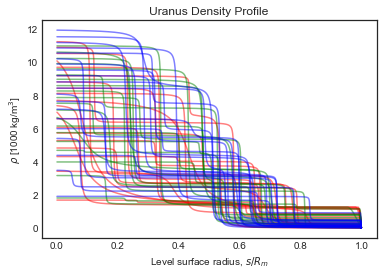

In [32]:
rho_profile1(deg4_obsJ0,'Uranus Density Profile', 'red')
rho_profile1(deg6_obsJ0,'Uranus Density Profile', 'green', newfig=False)
rho_profile1(deg8_obsJ0,'Uranus Density Profile', 'blue', newfig=False)

Found 2000 planets in uranus/samples/deg4_obsJ0_planets.pickle.
Found 2000 planets in uranus/samples/deg6_obsJ0_planets.pickle.
Found 2000 planets in uranus/samples/deg8_obsJ0_planets.pickle.


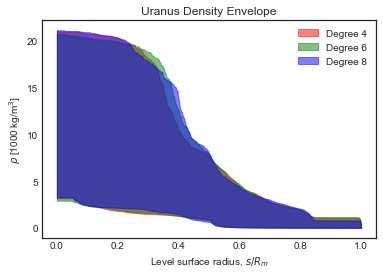

In [33]:
density_envelope(deg4_obsJ0,'red', label='Degree 4')
density_envelope(deg6_obsJ0, 'green', newfig=False, label='Degree 6')
density_envelope(deg8_obsJ0, 'blue', newfig=False, label='Degree 8')